### Importing relevant libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline
import nba_api
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
import time
from scipy import stats

### Data Wrangling & Cleaning

In [2]:
### List of NBA Centers (Dataset downloaded externally, contains player full names and positions)
df = pd.read_csv("nbaplayers.csv", encoding='cp1252')
centers = df[df['POS'] == 'C']
centers1 = df[df['POS'] == 'C-F']
centers2 = df[df['POS'] == 'F-C']

centers = centers.append(centers1)
centers = centers.append(centers2)
centerslist = []

for row in centers['FULL NAME']:
    centerslist.append(row)

In [3]:
len(centerslist)
for center in centerslist:
    print(center)

Ivica Zubac
Clint Capela
Rudy Gobert
Deandre Ayton
Nikola Jokic
Brook Lopez
Willie Cauley-Stein
Jusuf Nurkic
Andre Drummond
Marc Gasol
Enes Kanter
Alex Len
Robin Lopez
Daniel Oturu
Jonas Valanciunas
Dewayne Dedmon
Boban Marjanovic
DeMarcus Cousins
Tacko Fall
Dwight Howard
Joel Embiid
Nerlens Noel
Tristan Thompson
Bam Adebayo
JaVale McGee
Bol Bol
Robert Williams III
Udoka Azubuike
Nicolas Claxton
John Collins
Onyeka Okongwu
JaMychal Green
Kristaps Porzingis
Dwight Powell
Dario Saric
Frank Kaminsky
Anthony Davis
Daniel Gafford
Jaren Jackson Jr.
Zeke Nnaji
Reggie Perry
Julius Randle
Montrezl Harrell
Jalen Smith
Bruno Fernando
Nathan Knight
Luke Kornet
Harry Giles III


In [4]:
### Building out dataset to aggregate data for all centers in centerslist
### Using centerslist loop to access api for each center's full name
counter = 0
df_playerallgames = pd.DataFrame()
while counter < len(centerslist):
    player_dict = players.get_players()
    time.sleep(.600)
    try: 
        playerinfo = [player for player in player_dict if player['full_name'] == centerslist[counter]][0]
        time.sleep(.600)
    except:
        counter += 1
        continue
    playerid = playerinfo['id']
    time.sleep(.600)
    playerallgames = playergamelog.PlayerGameLog(player_id=playerid, season = SeasonAll.all)
    ## Convert lists to df
    allgames = playerallgames.get_data_frames()[0]
    allgames = allgames[::-1]
    allgames['rollingavgrebounds5'] = allgames['REB'].rolling(window=5).mean()
    allgames['rollingavgrebounds50'] = allgames['REB'].rolling(window=50).mean()
    allgames['rollingavgminutes2'] = allgames['MIN'].rolling(window=3).mean()
    allgames['WL'] = allgames['WL'].replace(to_replace=['W', 'L'], value=[1, 0])
    allgames['WinsLast5'] = allgames['WL'].rolling(min_periods=1, window=5).sum()
    allgames = allgames[::-1]
    df_playerallgames = df_playerallgames.append(allgames,ignore_index=True)
    counter += 1
    


In [5]:
df_playerallgames = df_playerallgames.dropna()


df_playerallgames['WinsLast5'] = df_playerallgames['WinsLast5'].shift(-1)

display(df_playerallgames.head(15))

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,rollingavgrebounds5,rollingavgrebounds50,rollingavgminutes2,WinsLast5
0,22020,1627826,0022001074,"MAY 16, 2021",LAC @ OKC,0,0,0,0,0.000,...,0,0,1,0,0,1,5.8,7.80,12.666667,3.0
1,22020,1627826,0022001058,"MAY 14, 2021",LAC @ HOU,0,3,1,1,1.000,...,0,0,1,3,4,1,7.4,7.86,22.666667,4.0
2,22020,1627826,0022001047,"MAY 13, 2021",LAC @ CHA,1,35,3,4,0.750,...,2,3,4,8,15,1,9.0,8.00,28.666667,3.0
3,22020,1627826,0022001034,"MAY 11, 2021",LAC @ TOR,1,30,8,12,0.667,...,1,0,2,18,22,1,8.2,7.92,26.333333,2.0
4,22020,1627826,0022001019,"MAY 09, 2021",LAC vs. NYK,0,21,3,4,0.750,...,0,0,2,6,-8,1,7.6,7.88,26.333333,2.0
5,22020,1627826,0022001002,"MAY 06, 2021",LAC vs. LAL,1,28,5,5,1.000,...,1,1,3,14,16,1,7.2,7.92,27.333333,2.0
6,22020,1627826,0022000989,"MAY 04, 2021",LAC vs. TOR,1,30,4,6,0.667,...,2,2,4,8,21,1,7.2,7.98,26.333333,2.0
7,22020,1627826,0022000966,"MAY 01, 2021",LAC vs. DEN,0,24,1,3,0.333,...,0,1,3,6,5,1,7.0,7.94,23.000000,3.0
8,22020,1627826,0022000941,"APR 28, 2021",LAC @ PHX,0,25,7,9,0.778,...,0,1,0,14,-8,1,6.8,8.04,23.000000,4.0
9,22020,1627826,0022000924,"APR 26, 2021",LAC @ NOP,0,20,1,2,0.500,...,1,3,3,4,-9,1,6.6,8.02,25.666667,4.0


In [6]:
## Adding Opponent Column
df_playerallgames['Opponent'] = df_playerallgames['MATCHUP'].str[-3:]

## Adding Current Team Column

df_playerallgames['Team'] = df_playerallgames['MATCHUP'].str[0:3]

## Adding Home / Away Column
df_playerallgames["Home/Away"] = df_playerallgames["MATCHUP"].map(lambda x: "Home" if "vs." in x else "Away" if "@" in x else "")

dropteams = ['SEA', 'NOK', 'PHO', 'PHL', 'NJN']
df_playerallgames = df_playerallgames[~df_playerallgames['Opponent'].isin(dropteams)]



    
### If last game is Home
display(df_playerallgames)


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,VIDEO_AVAILABLE,rollingavgrebounds5,rollingavgrebounds50,rollingavgminutes2,WinsLast5,Opponent,Team,Home/Away
0,22020,1627826,0022001074,"MAY 16, 2021",LAC @ OKC,0,0,0,0,0.000,...,0,0,1,5.8,7.80,12.666667,3.0,OKC,LAC,Away
1,22020,1627826,0022001058,"MAY 14, 2021",LAC @ HOU,0,3,1,1,1.000,...,3,4,1,7.4,7.86,22.666667,4.0,HOU,LAC,Away
2,22020,1627826,0022001047,"MAY 13, 2021",LAC @ CHA,1,35,3,4,0.750,...,8,15,1,9.0,8.00,28.666667,3.0,CHA,LAC,Away
3,22020,1627826,0022001034,"MAY 11, 2021",LAC @ TOR,1,30,8,12,0.667,...,18,22,1,8.2,7.92,26.333333,2.0,TOR,LAC,Away
4,22020,1627826,0022001019,"MAY 09, 2021",LAC vs. NYK,0,21,3,4,0.750,...,6,-8,1,7.6,7.88,26.333333,2.0,NYK,LAC,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,22018,1628385,0021801022,"MAR 14, 2019",SAC @ BOS,0,19,2,5,0.400,...,4,-13,1,5.2,3.88,20.000000,2.0,BOS,SAC,Away
16880,22018,1628385,0021801002,"MAR 11, 2019",SAC @ WAS,0,22,5,10,0.500,...,12,-2,1,5.4,3.84,20.666667,2.0,WAS,SAC,Away
16881,22018,1628385,0021800986,"MAR 09, 2019",SAC @ NYK,1,19,2,11,0.182,...,6,4,1,5.6,3.84,20.666667,1.0,NYK,SAC,Away
16882,22018,1628385,0021800973,"MAR 06, 2019",SAC vs. BOS,0,21,2,7,0.286,...,6,2,1,5.4,3.82,20.000000,2.0,BOS,SAC,Home


In [7]:
### for every row, if game is Home, find Team name and match it to start, and then match opponent to end in distances DF

df_playerallgames['PreviousHome/Away'] = df_playerallgames['Home/Away'].shift(-1)


In [8]:
display(df_playerallgames)


df_playerallgames['PreviousOpp'] = df_playerallgames['Opponent'].shift(-1)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PLUS_MINUS,VIDEO_AVAILABLE,rollingavgrebounds5,rollingavgrebounds50,rollingavgminutes2,WinsLast5,Opponent,Team,Home/Away,PreviousHome/Away
0,22020,1627826,0022001074,"MAY 16, 2021",LAC @ OKC,0,0,0,0,0.000,...,0,1,5.8,7.80,12.666667,3.0,OKC,LAC,Away,Away
1,22020,1627826,0022001058,"MAY 14, 2021",LAC @ HOU,0,3,1,1,1.000,...,4,1,7.4,7.86,22.666667,4.0,HOU,LAC,Away,Away
2,22020,1627826,0022001047,"MAY 13, 2021",LAC @ CHA,1,35,3,4,0.750,...,15,1,9.0,8.00,28.666667,3.0,CHA,LAC,Away,Away
3,22020,1627826,0022001034,"MAY 11, 2021",LAC @ TOR,1,30,8,12,0.667,...,22,1,8.2,7.92,26.333333,2.0,TOR,LAC,Away,Home
4,22020,1627826,0022001019,"MAY 09, 2021",LAC vs. NYK,0,21,3,4,0.750,...,-8,1,7.6,7.88,26.333333,2.0,NYK,LAC,Home,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,22018,1628385,0021801022,"MAR 14, 2019",SAC @ BOS,0,19,2,5,0.400,...,-13,1,5.2,3.88,20.000000,2.0,BOS,SAC,Away,Away
16880,22018,1628385,0021801002,"MAR 11, 2019",SAC @ WAS,0,22,5,10,0.500,...,-2,1,5.4,3.84,20.666667,2.0,WAS,SAC,Away,Away
16881,22018,1628385,0021800986,"MAR 09, 2019",SAC @ NYK,1,19,2,11,0.182,...,4,1,5.6,3.84,20.666667,1.0,NYK,SAC,Away,Home
16882,22018,1628385,0021800973,"MAR 06, 2019",SAC vs. BOS,0,21,2,7,0.286,...,2,1,5.4,3.82,20.000000,2.0,BOS,SAC,Home,Home


In [9]:
### More cleaning - changing relevant columns to str

df_playerallgames['PreviousHome/Away'] = df_playerallgames['PreviousHome/Away'].astype('str') 
df_playerallgames['Home/Away'] = df_playerallgames['Home/Away'].astype('str') 


In [10]:
### Getting Starting City for Team Travels

def start(df):

    if (df['PreviousHome/Away'] == 'Home') and (df['Home/Away'] == 'Away'):
        return df['Team']
    elif (df['PreviousHome/Away'] == 'Home') and (df['Home/Away'] == 'Home'):
        return df['Team']
    elif (df['PreviousHome/Away'] == 'Away') and (df['Home/Away'] == 'Home'):
        return df['PreviousOpp']
    elif (df['PreviousHome/Away'] == 'Away') and (df['Home/Away'] == 'Away'):
        return df['PreviousOpp']

df_playerallgames['start'] = df_playerallgames.apply(start, axis = 1)

In [11]:
### Getting Ending City for Team Travels

def end(df):

    if (df['PreviousHome/Away'] == 'Home') and (df['Home/Away'] == 'Away'):
        return df['Opponent']
    elif (df['PreviousHome/Away'] == 'Home') and (df['Home/Away'] == 'Home'):
        return df['Team']
    elif (df['PreviousHome/Away'] == 'Away') and (df['Home/Away'] == 'Home'):
        return df['Team']
    elif (df['PreviousHome/Away'] == 'Away') and (df['Home/Away'] == 'Away'):
        return df['Opponent']

df_playerallgames['end'] = df_playerallgames.apply(end, axis = 1)

In [12]:
### Adding Distances if Home game (Dataset downloaded externally)


distances = pd.read_csv("distance.csv")


display(distances.head(15))

,Start,End,Duration (mins),Duration (hrs)
0,MIA,POR,3459,58
1,POR,MIA,3457,58
2,GSW,BOS,3311,55
3,BOS,GSW,3307,55
4,POR,BOS,3302,55
5,BOS,POR,3296,55
6,SAC,MIA,3293,55
7,MIA,SAC,3286,55
8,GSW,MIA,3286,55
9,MIA,GSW,3282,55


In [13]:
## merge distances dataset with our dataset

merged = pd.merge(df_playerallgames, distances, left_on=  ['start', 'end'],
                   right_on= ['Start', 'End'], 
                   how = 'left')

In [14]:
display(merged)

df_playerallgames = merged

df_playerallgames = df_playerallgames.dropna()

## Verifying results
display(df_playerallgames)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Team,Home/Away,PreviousHome/Away,PreviousOpp,start,end,Start,End,Duration (mins),Duration (hrs)
0,22020,1627826,0022001074,"MAY 16, 2021",LAC @ OKC,0,0,0,0,0.000,...,LAC,Away,Away,HOU,HOU,OKC,HOU,OKC,498.0,8.0
1,22020,1627826,0022001058,"MAY 14, 2021",LAC @ HOU,0,3,1,1,1.000,...,LAC,Away,Away,CHA,CHA,HOU,CHA,HOU,1151.0,19.0
2,22020,1627826,0022001047,"MAY 13, 2021",LAC @ CHA,1,35,3,4,0.750,...,LAC,Away,Away,TOR,TOR,CHA,TOR,CHA,869.0,14.0
3,22020,1627826,0022001034,"MAY 11, 2021",LAC @ TOR,1,30,8,12,0.667,...,LAC,Away,Home,NYK,LAC,TOR,LAC,TOR,2686.0,45.0
4,22020,1627826,0022001019,"MAY 09, 2021",LAC vs. NYK,0,21,3,4,0.750,...,LAC,Home,Home,LAL,LAC,LAC,LAC,LAC,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14805,22018,1628385,0021801022,"MAR 14, 2019",SAC @ BOS,0,19,2,5,0.400,...,SAC,Away,Away,WAS,WAS,BOS,WAS,BOS,534.0,9.0
14806,22018,1628385,0021801002,"MAR 11, 2019",SAC @ WAS,0,22,5,10,0.500,...,SAC,Away,Away,NYK,NYK,WAS,NYK,WAS,275.0,5.0
14807,22018,1628385,0021800986,"MAR 09, 2019",SAC @ NYK,1,19,2,11,0.182,...,SAC,Away,Home,BOS,SAC,NYK,SAC,NYK,2970.0,50.0
14808,22018,1628385,0021800973,"MAR 06, 2019",SAC vs. BOS,0,21,2,7,0.286,...,SAC,Home,Home,NYK,SAC,SAC,SAC,SAC,0.0,0.0


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Team,Home/Away,PreviousHome/Away,PreviousOpp,start,end,Start,End,Duration (mins),Duration (hrs)
0,22020,1627826,0022001074,"MAY 16, 2021",LAC @ OKC,0,0,0,0,0.000,...,LAC,Away,Away,HOU,HOU,OKC,HOU,OKC,498.0,8.0
1,22020,1627826,0022001058,"MAY 14, 2021",LAC @ HOU,0,3,1,1,1.000,...,LAC,Away,Away,CHA,CHA,HOU,CHA,HOU,1151.0,19.0
2,22020,1627826,0022001047,"MAY 13, 2021",LAC @ CHA,1,35,3,4,0.750,...,LAC,Away,Away,TOR,TOR,CHA,TOR,CHA,869.0,14.0
3,22020,1627826,0022001034,"MAY 11, 2021",LAC @ TOR,1,30,8,12,0.667,...,LAC,Away,Home,NYK,LAC,TOR,LAC,TOR,2686.0,45.0
4,22020,1627826,0022001019,"MAY 09, 2021",LAC vs. NYK,0,21,3,4,0.750,...,LAC,Home,Home,LAL,LAC,LAC,LAC,LAC,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14804,22018,1628385,0021801027,"MAR 15, 2019",SAC @ PHI,0,18,6,9,0.667,...,SAC,Away,Away,BOS,BOS,PHI,BOS,PHI,377.0,6.0
14805,22018,1628385,0021801022,"MAR 14, 2019",SAC @ BOS,0,19,2,5,0.400,...,SAC,Away,Away,WAS,WAS,BOS,WAS,BOS,534.0,9.0
14806,22018,1628385,0021801002,"MAR 11, 2019",SAC @ WAS,0,22,5,10,0.500,...,SAC,Away,Away,NYK,NYK,WAS,NYK,WAS,275.0,5.0
14807,22018,1628385,0021800986,"MAR 09, 2019",SAC @ NYK,1,19,2,11,0.182,...,SAC,Away,Home,BOS,SAC,NYK,SAC,NYK,2970.0,50.0


In [15]:
### changing date column into date/time column to be able to manipulate it

df_playerallgames.GAME_DATE = pd.to_datetime(df_playerallgames.GAME_DATE, errors='coerce')

C:\Users\Mario Hage\DS Springboard\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
### Finding player means 

df_playerallgames['PlayerMeanREB'] = df_playerallgames.groupby(['Player_ID'])['REB'].transform('mean')



<ipython-input-16-14fe74a91eea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playerallgames['PlayerMeanREB'] = df_playerallgames.groupby(['Player_ID'])['REB'].transform('mean')


In [17]:

### Getting "Score" for a players performance per game as compared to their lifetime average

df_playerallgames['REBScore'] = df_playerallgames['REB'] / df_playerallgames['rollingavgrebounds50']



<ipython-input-17-ed92a3599c48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playerallgames['REBScore'] = df_playerallgames['REB'] / df_playerallgames['rollingavgrebounds50']


In [18]:
## Rolling Avg Score
df_playerallgames = df_playerallgames[::-1]
df_playerallgames['rollingavgREBscore3Games'] = df_playerallgames['REBScore'].rolling(window=3).mean()
df_playerallgames = df_playerallgames[::-1]

display(df_playerallgames.head(10))

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PreviousOpp,start,end,Start,End,Duration (mins),Duration (hrs),PlayerMeanREB,REBScore,rollingavgREBscore3Games
0,22020,1627826,0022001074,2021-05-16,LAC @ OKC,0,0,0,0,0.000,...,HOU,HOU,OKC,HOU,OKC,498.0,8.0,6.544681,0.000000,0.458333
1,22020,1627826,0022001058,2021-05-14,LAC @ HOU,0,3,1,1,1.000,...,CHA,CHA,HOU,CHA,HOU,1151.0,19.0,6.544681,0.000000,0.879209
2,22020,1627826,0022001047,2021-05-13,LAC @ CHA,1,35,3,4,0.750,...,TOR,TOR,CHA,TOR,CHA,869.0,14.0,6.544681,1.375000,1.217618
3,22020,1627826,0022001034,2021-05-11,LAC @ TOR,1,30,8,12,0.667,...,NYK,LAC,TOR,LAC,TOR,2686.0,45.0,6.544681,1.262626,1.095985
4,22020,1627826,0022001019,2021-05-09,LAC vs. NYK,0,21,3,4,0.750,...,LAL,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.015228,1.009279
5,22020,1627826,0022001002,2021-05-06,LAC vs. LAL,1,28,5,5,1.000,...,TOR,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.010101,0.964740
6,22020,1627826,0022000989,2021-05-04,LAC vs. TOR,1,30,4,6,0.667,...,DEN,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.002506,0.918255
7,22020,1627826,0022000966,2021-05-01,LAC vs. DEN,0,24,1,3,0.333,...,PHX,PHX,LAC,PHX,LAC,406.0,7.0,6.544681,0.881612,0.833463
8,22020,1627826,0022000941,2021-04-28,LAC @ PHX,0,25,7,9,0.778,...,NOP,NOP,PHX,NOP,PHX,1594.0,27.0,6.544681,0.870647,0.871267
9,22020,1627826,0022000924,2021-04-26,LAC @ NOP,0,20,1,2,0.500,...,HOU,HOU,NOP,HOU,NOP,390.0,7.0,6.544681,0.748130,0.871991


In [19]:
## Reshifting to align column correctly

df_playerallgames['rollingavgREBscore3Games'] = df_playerallgames['rollingavgREBscore3Games'].shift(-1)

In [20]:
## Assigning Target to transform problem into a classification problemp0o


df_playerallgames["REB>10"] = df_playerallgames["REB"].map(lambda x: 1 if x > 10 else 0)


In [21]:
display(df_playerallgames.head(10))


df_playerallgames = df_playerallgames.dropna()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,start,end,Start,End,Duration (mins),Duration (hrs),PlayerMeanREB,REBScore,rollingavgREBscore3Games,REB>10
0,22020,1627826,0022001074,2021-05-16,LAC @ OKC,0,0,0,0,0.000,...,HOU,OKC,HOU,OKC,498.0,8.0,6.544681,0.000000,0.879209,0
1,22020,1627826,0022001058,2021-05-14,LAC @ HOU,0,3,1,1,1.000,...,CHA,HOU,CHA,HOU,1151.0,19.0,6.544681,0.000000,1.217618,0
2,22020,1627826,0022001047,2021-05-13,LAC @ CHA,1,35,3,4,0.750,...,TOR,CHA,TOR,CHA,869.0,14.0,6.544681,1.375000,1.095985,1
3,22020,1627826,0022001034,2021-05-11,LAC @ TOR,1,30,8,12,0.667,...,LAC,TOR,LAC,TOR,2686.0,45.0,6.544681,1.262626,1.009279,0
4,22020,1627826,0022001019,2021-05-09,LAC vs. NYK,0,21,3,4,0.750,...,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.015228,0.964740,0
5,22020,1627826,0022001002,2021-05-06,LAC vs. LAL,1,28,5,5,1.000,...,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.010101,0.918255,0
6,22020,1627826,0022000989,2021-05-04,LAC vs. TOR,1,30,4,6,0.667,...,LAC,LAC,LAC,LAC,0.0,0.0,6.544681,1.002506,0.833463,0
7,22020,1627826,0022000966,2021-05-01,LAC vs. DEN,0,24,1,3,0.333,...,PHX,LAC,PHX,LAC,406.0,7.0,6.544681,0.881612,0.871267,0
8,22020,1627826,0022000941,2021-04-28,LAC @ PHX,0,25,7,9,0.778,...,NOP,PHX,NOP,PHX,1594.0,27.0,6.544681,0.870647,0.871991,0
9,22020,1627826,0022000924,2021-04-26,LAC @ NOP,0,20,1,2,0.500,...,HOU,NOP,HOU,NOP,390.0,7.0,6.544681,0.748130,0.871991,0


In [22]:
df_playerallgames.describe()

,Player_ID,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,rollingavgrebounds5,rollingavgrebounds50,rollingavgminutes2,WinsLast5,Duration (mins),Duration (hrs),PlayerMeanREB,REBScore,rollingavgREBscore3Games,REB>10
count,1.451100e+04,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,...,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000,14511.000000
mean,4.265403e+05,0.514299,26.145958,5.057474,9.587968,0.525035,0.377300,1.111019,0.106367,2.641031,...,8.120612,8.046147,26.142627,2.568879,741.429467,12.369513,8.128690,1.018924,1.019084,0.287230
std,5.392879e+05,0.499813,9.398223,3.219343,5.577395,0.222298,0.892548,2.000933,0.238393,2.795969,...,3.577248,3.140888,8.247852,1.272053,707.133906,11.798535,2.751091,0.520837,0.343375,0.452486
min,2.730000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.560000,1.666667,0.000000,0.000000,0.000000,2.511905,0.000000,0.000000,0.000000
25%,2.015800e+05,0.000000,20.000000,3.000000,5.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,5.400000,5.640000,20.333333,2.000000,0.000000,0.000000,5.869029,0.675676,0.805163,0.000000
50%,2.030830e+05,1.000000,27.000000,5.000000,9.000000,0.500000,0.000000,0.000000,0.000000,2.000000,...,7.800000,7.820000,27.666667,3.000000,635.000000,11.000000,7.848101,0.974930,0.992282,0.000000
75%,2.039910e+05,1.000000,33.000000,7.000000,13.000000,0.667000,0.000000,1.000000,0.000000,4.000000,...,10.600000,10.280000,32.333333,4.000000,1142.000000,19.000000,10.476285,1.300578,1.197521,1.000000
max,1.629655e+06,1.000000,54.000000,24.000000,35.000000,1.000000,9.000000,15.000000,1.000000,26.000000,...,21.600000,16.980000,45.333333,5.000000,3459.000000,58.000000,14.201342,6.179775,4.122649,1.000000


In [23]:

df_playerallgames.dtypes


SEASON_ID                           object
Player_ID                            int64
Game_ID                             object
GAME_DATE                   datetime64[ns]
MATCHUP                             object
WL                                   int64
MIN                                  int64
FGM                                  int64
FGA                                  int64
FG_PCT                             float64
FG3M                                 int64
FG3A                                 int64
FG3_PCT                            float64
FTM                                  int64
FTA                                  int64
FT_PCT                             float64
OREB                                 int64
DREB                                 int64
REB                                float64
AST                                  int64
STL                                  int64
BLK                                  int64
TOV                                  int64
PF         

### EDA

C:\Users\Mario Hage\DS Springboard\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rebounds')

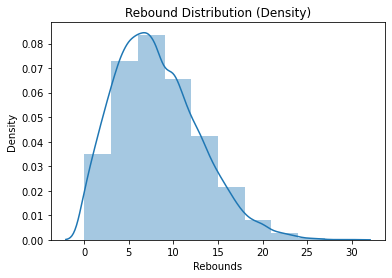

In [24]:

ax = sns.distplot(df_playerallgames['REB'], bins=10)

plt.title("Rebound Distribution (Density)")
plt.xlabel('Rebounds')

Text(0, 0.5, 'Count of Rebounds')

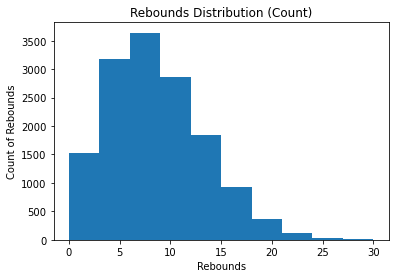

In [25]:
ax = plt.hist(df_playerallgames['REB'])

plt.title("Rebounds Distribution (Count)")
plt.xlabel('Rebounds')
plt.ylabel('Count of Rebounds')

Text(0.5, 1.0, 'Rebs vs Rolling Avg of Mins (3 Games)')

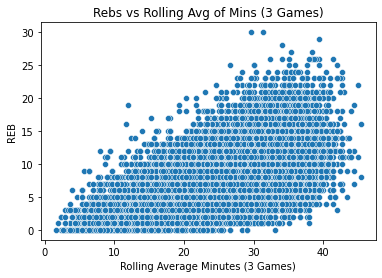

In [26]:
sns.scatterplot(x=df_playerallgames['rollingavgminutes2'], y=df_playerallgames['REB'])

plt.xlabel('Rolling Average Minutes (3 Games)')
plt.title('Rebs vs Rolling Avg of Mins (3 Games)')

Text(0.5, 1.0, 'Rebs vs Travel Time (Hrs)')

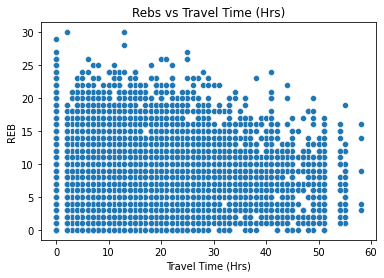

In [27]:
sns.scatterplot(x=df_playerallgames['Duration (hrs)'], y=df_playerallgames['REB'])

plt.xlabel('Travel Time (Hrs)')
plt.title('Rebs vs Travel Time (Hrs)')


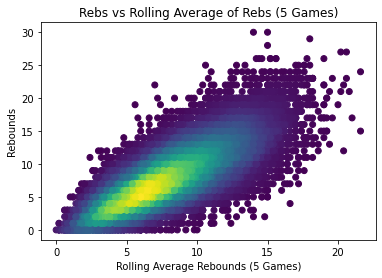

In [28]:
from scipy.stats import gaussian_kde


# Generate fake data
x = df_playerallgames['rollingavgrebounds5']
y = df_playerallgames['REB']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z)
plt.xlabel('Rolling Average Rebounds (5 Games)')
plt.ylabel('Rebounds')
plt.title('Rebs vs Rolling Average of Rebs (5 Games)')
plt.show()




### Notice that if Rolling Avg. Rebounds for past 5 games is >= ~ 17.5 there are NO games where Centers grab less than 9 Rebounds

Text(0.5, 1.0, 'Average Rebounds Grabbed by Player vs Opposing Team')

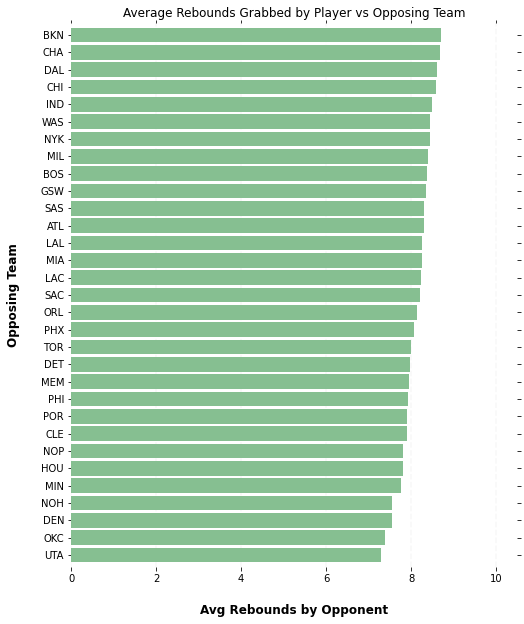

In [29]:
avgreboundsbyopponent = df_playerallgames.groupby(['Opponent'])['REB'].mean().sort_values()



ax = avgreboundsbyopponent.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Opponent", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Opposing Team", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

ax.set_title("Average Rebounds Grabbed by Player vs Opposing Team")

In [30]:

### The above graph shows that Centers across the league tend to grab less rebounds vs the Bottom teams (UTA, OKC, DEN, HOU, etc.) Roughly 1 Rebound less than teams like BKN, CHA, CHI

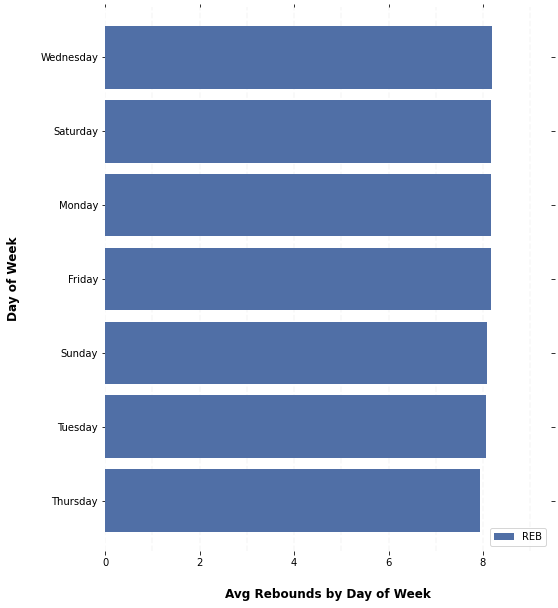

In [31]:
### Avg Rebounds by Weekday

rebsbyweekday = pd.DataFrame(df_playerallgames.groupby(df_playerallgames['GAME_DATE'].dt.day_name()).REB.mean().sort_values().reset_index())


ax = rebsbyweekday.plot(kind='barh', x='GAME_DATE', y='REB', figsize=(8, 10), color='#506fa6', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Avg Rebounds by Day of Week", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Day of Week", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

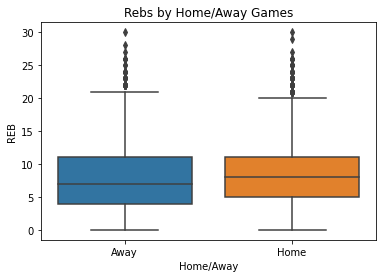

In [32]:
ax = sns.boxplot(x='Home/Away', y='REB', data=df_playerallgames).set_title("Rebs by Home/Away Games")


Text(0.5, 1.0, 'REBS vs Team wins in Last 5 Games')

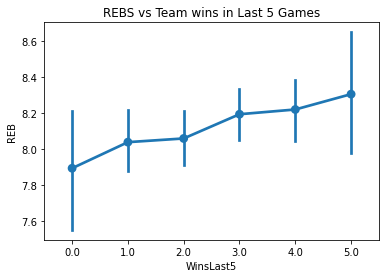

In [33]:
### Correlation between Team Wins and REBS
ax = sns.pointplot(x="WinsLast5", y="REB",
                   data=df_playerallgames)

ax.set_title("REBS vs Team wins in Last 5 Games")


Text(0.5, 1.0, 'Rebs vs Team Wins in Last 5 Games vs Home/Away')

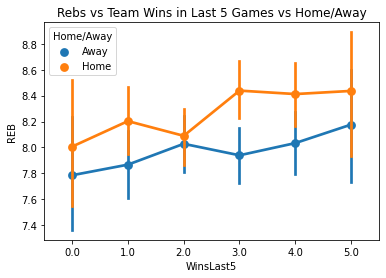

In [34]:



### correcltion between Teams wins and REBS, hued by home/away
ax = sns.pointplot(x="WinsLast5", y="REB", hue='Home/Away',
                   data=df_playerallgames)

ax.set_title("Rebs vs Team Wins in Last 5 Games vs Home/Away")

### Target and Feature Variability



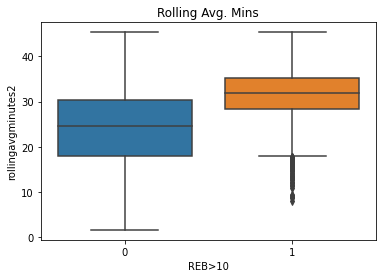

In [73]:
ax = sns.boxplot(x='REB>10', y='rollingavgminutes2', data=df_playerallgames).set_title("Rolling Avg. Mins")

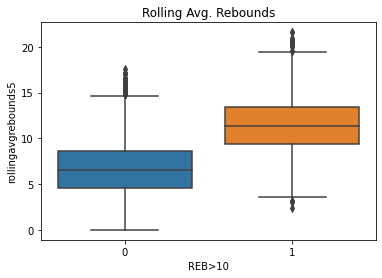

In [75]:
ax = sns.boxplot(x='REB>10', y='rollingavgrebounds5', data=df_playerallgames).set_title("Rolling Avg. Rebounds")

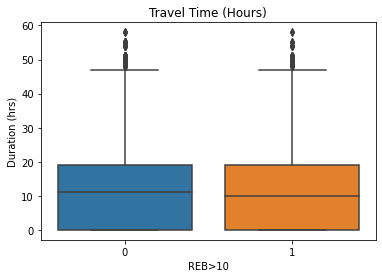

In [77]:
ax = sns.boxplot(x='REB>10', y='Duration (hrs)', data=df_playerallgames).set_title("Travel Time (Hours)")

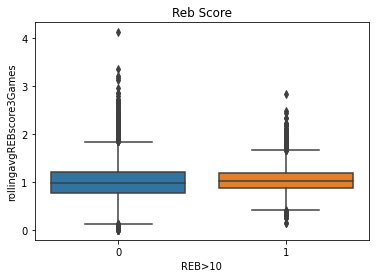

In [80]:
ax = sns.boxplot(x='REB>10', y='rollingavgREBscore3Games', data=df_playerallgames).set_title("Reb Score")

In [35]:
## Getting Data ready for modeling
df_playerallgames = pd.get_dummies(df_playerallgames, columns=["Opponent", "Home/Away", "PreviousHome/Away"], prefix=["OPP", "location", "PreviousHome/Away"])



Correlation between various features


Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'rollingavgrebounds5',
       'rollingavgrebounds50', 'rollingavgminutes2', 'WinsLast5', 'Team',
       'PreviousOpp', 'start', 'end', 'Start', 'End', 'Duration (mins)',
       'Duration (hrs)', 'PlayerMeanREB', 'REBScore',
       'rollingavgREBscore3Games', 'REB>10', 'OPP_ATL', 'OPP_BKN', 'OPP_BOS',
       'OPP_CHA', 'OPP_CHI', 'OPP_CLE', 'OPP_DAL', 'OPP_DEN', 'OPP_DET',
       'OPP_GSW', 'OPP_HOU', 'OPP_IND', 'OPP_LAC', 'OPP_LAL', 'OPP_MEM',
       'OPP_MIA', 'OPP_MIL', 'OPP_MIN', 'OPP_NOH', 'OPP_NOP', 'OPP_NYK',
       'OPP_OKC', 'OPP_ORL', 'OPP_PHI', 'OPP_PHX', 'OPP_POR', 'OPP_SAC',
       'OPP_SAS', 'OPP_TOR', 'OPP_UTA', 'OPP_WAS', 'location_Away',
       'location_Home', 'PreviousHome/Away_Away', 'PreviousHome/

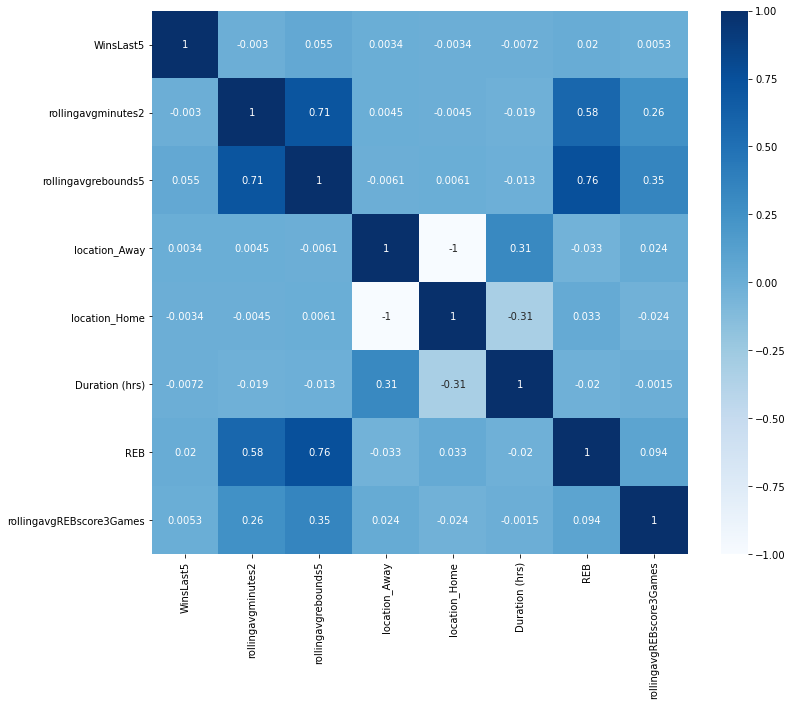

In [36]:
corrheatmapfeatures = df_playerallgames[[ 'WinsLast5', 'rollingavgminutes2','rollingavgrebounds5', 'location_Away', 'location_Home', 'Duration (hrs)', 'REB', 'rollingavgREBscore3Games']]

### Correlation between all features (teams not included)

plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(corrheatmapfeatures.corr(), annot=True,cmap ='Blues')

df_playerallgames.columns

In [37]:
# Biserial Correlations
columns = ['rollingavgminutes2', 'rollingavgrebounds5', 'Duration (hrs)', 'location_Home', 'location_Away', 'rollingavgREBscore3Games']

for col in columns:
    reb = np.array(df_playerallgames['REB>10'].tolist())
    attribute = np.array(df_playerallgames[col].tolist())
    nas = np.logical_or(np.isnan(reb), np.isnan(attribute))
    result = stats.pointbiserialr(reb[~nas], attribute[~nas])
    print(result)

PointbiserialrResult(correlation=0.4164377917743108, pvalue=0.0)
PointbiserialrResult(correlation=0.6030270818005128, pvalue=0.0)
PointbiserialrResult(correlation=-0.0031902445679760105, pvalue=0.7007784327708922)
PointbiserialrResult(correlation=0.02541704520429896, pvalue=0.002198567575597785)
PointbiserialrResult(correlation=-0.025417045204299007, pvalue=0.002198567575597785)
PointbiserialrResult(correlation=0.0588234838725807, pvalue=1.3266413842478997e-12)


### Modeling - Feature Importance

In [38]:

features = df_playerallgames[[ 'WinsLast5', 'rollingavgminutes2', 'OPP_ATL', 'OPP_BKN', 'OPP_BOS', 'OPP_CHA', 'OPP_CHI',
       'OPP_CLE', 'OPP_DAL', 'OPP_DEN', 'OPP_DET', 'OPP_GSW', 'OPP_HOU',
       'OPP_IND', 'OPP_LAC', 'OPP_LAL', 'OPP_MEM', 'OPP_MIA', 'OPP_MIL',
       'OPP_MIN', 'OPP_NOH', 'OPP_NOP', 'OPP_NYK', 'OPP_OKC', 'OPP_ORL',
       'OPP_PHI', 'OPP_PHX', 'OPP_POR', 'OPP_SAC', 'OPP_SAS', 'OPP_TOR',
       'OPP_UTA', 'OPP_WAS', 'location_Away', 'location_Home', 'Duration (hrs)', 'PreviousHome/Away_Home', 'PreviousHome/Away_Away', 'rollingavgREBscore3Games']]
target = df_playerallgames['REB>10']



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve, fbeta_score,plot_precision_recall_curve






import warnings 
warnings.filterwarnings('ignore')

rf = RandomForestClassifier(n_estimators=100)

X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
rf.fit(X_train, y_train)

pd.options.display.float_format = '{:20,.2f}'.format

display(rf.feature_importances_)


keyvalues = dict(zip(X, rf.feature_importances_))

display(keyvalues)

array([5.07585477e-02, 1.78844143e-01, 3.78805015e-01, 4.32951037e-03,
       4.16481977e-03, 4.98205732e-03, 5.09779462e-03, 4.95986398e-03,
       4.93204257e-03, 5.01016665e-03, 4.45997005e-03, 5.62147630e-03,
       4.81393608e-03, 4.99157436e-03, 4.45998976e-03, 5.44525317e-03,
       5.30502119e-03, 4.61498614e-03, 4.57644062e-03, 4.40831321e-03,
       5.07099455e-03, 3.60111589e-04, 4.90401467e-03, 4.64939975e-03,
       4.48683041e-03, 5.11094909e-03, 4.82093589e-03, 5.30632008e-03,
       4.71064398e-03, 5.12705592e-03, 5.40503633e-03, 4.67677520e-03,
       4.34882765e-03, 4.69884005e-03, 6.49726837e-03, 6.21475387e-03,
       6.87000234e-02, 9.36882360e-03, 9.39565411e-03, 1.45565820e-01])

{'WinsLast5': 0.050758547749473554,
 'rollingavgminutes2': 0.17884414268054308,
 'rollingavgrebounds5': 0.3788050152290544,
 'OPP_ATL': 0.004329510366784768,
 'OPP_BKN': 0.004164819770918081,
 'OPP_BOS': 0.004982057323514048,
 'OPP_CHA': 0.005097794617651523,
 'OPP_CHI': 0.0049598639777465765,
 'OPP_CLE': 0.004932042569220045,
 'OPP_DAL': 0.005010166652688406,
 'OPP_DEN': 0.004459970051046029,
 'OPP_DET': 0.005621476298267344,
 'OPP_GSW': 0.004813936077680448,
 'OPP_HOU': 0.004991574361358178,
 'OPP_IND': 0.004459989762137683,
 'OPP_LAC': 0.005445253174695959,
 'OPP_LAL': 0.005305021186284147,
 'OPP_MEM': 0.004614986137080766,
 'OPP_MIA': 0.004576440615629907,
 'OPP_MIL': 0.0044083132059503614,
 'OPP_MIN': 0.005070994549088146,
 'OPP_NOH': 0.00036011158931877735,
 'OPP_NOP': 0.004904014673263913,
 'OPP_NYK': 0.004649399751365807,
 'OPP_OKC': 0.004486830406000347,
 'OPP_ORL': 0.005110949092651474,
 'OPP_PHI': 0.004820935894873621,
 'OPP_PHX': 0.005306320080746615,
 'OPP_POR': 0.00471064

###### 

### Modeling - Random Forest

In [40]:
# instantiate RFC model, set up param_grid
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

# GridSearch to find best parameters 
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=5)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]},
             scoring='roc_auc')

In [41]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [42]:
# instantiate another RFC with optimal parameters, fit, predict, and calculate recall
rfc_best = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=500, max_depth=8, criterion='entropy')
rfc_best.fit(X_train, y_train)

y_pred = rfc_best.predict(X_test)
rfc_recall = recall_score(y_test, y_pred)

# use cross_val_score with scoring='roc_auc', to check variability
rfc_cv_score = cross_val_score(rfc_best, X_train, y_train, cv=5, scoring='roc_auc')
print(rfc_cv_score)
print("Mean AUC Score: ", rfc_cv_score.mean())


[0.8739944  0.89542272 0.88359206 0.88048515 0.87327372]
Mean AUC Score:  0.8813536115475198


In [43]:
# print classification report
print('Classification Report')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))


Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1060
           1       0.70      0.59      0.64       392

    accuracy                           0.82      1452
   macro avg       0.78      0.75      0.76      1452
weighted avg       0.82      0.82      0.82      1452



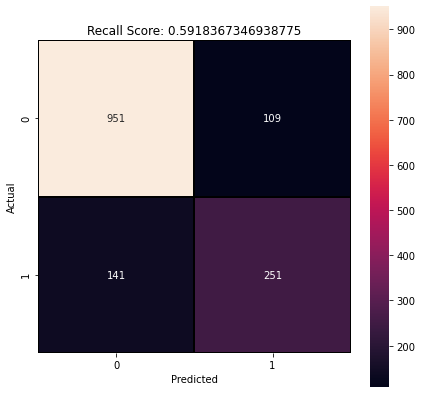

In [69]:
# plot confusion matrix in seaborn heatmap
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm_rfc, annot=True, fmt='.0f', linewidth=1, linecolor='black', square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Recall Score: {0}'.format(rfc_recall)
plt.title(all_sample_title);

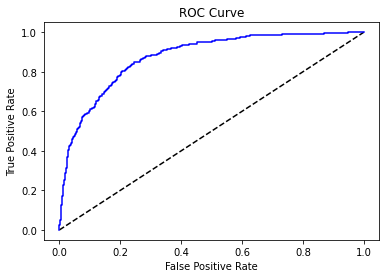

ROC_AUC:  0.8748315363881402


In [45]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc_best.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('ROC_AUC: ', roc_auc)

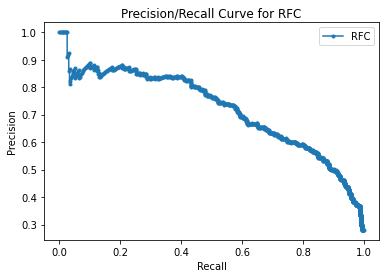

In [46]:
# plot precision/recall curve 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label='RFC')
plt.title('Precision/Recall Curve for RFC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [47]:
# calculate f-beta score
fbeta = fbeta_score(y_test, y_pred, average='weighted', beta=2)
fbeta

0.8198726186591535

In [48]:
# bootstrapping

n_iters = 10
recall = []
precision = []

for i in range(n_iters):
    
    # split data into training and test set, instantiate RFC model
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.5)
    model = RandomForestClassifier(random_state=i, max_features='auto', n_estimators=500, \
                                   max_depth=8, criterion='entropy')
    # fit and predict
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test_b)
    
    # calculate precision, recall
    score_recall = recall_score(y_test_b, y_pred_b)
    score_precision = precision_score(y_test_b, y_pred_b)
    
    # append scores to lists
    recall.append(score_recall)
    precision.append(score_precision)

In [49]:
# get confidence intervals for precision and recall

alpha = 0.95
p_low = 2.5
p_high = 97.5

lower_recall = max(0.0, np.percentile(recall, 2.5))
upper_recall = min(1.0, np.percentile(recall, 97.5))
lower_precision = max(0.0, np.percentile(precision, 2.5))
upper_precision = min(1.0, np.percentile(precision, 97.5))

print('%.1f confidence interval Recall: %.1f%% and %.1f%%' % (95, lower_recall*100, upper_recall*100))
print('%.1f confidence interval Precision: %.1f%% and %.1f%%' % (95, lower_precision*100, upper_precision*100))

95.0 confidence interval Recall: 57.1% and 60.7%
95.0 confidence interval Precision: 72.5% and 74.9%


### Modeling - K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# use GridSearchCV to find best value of C
knn_cv = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn_cv, param_grid, scoring='roc_auc', cv=5)
knn_gscv.fit(X_train, y_train)
n_neighbors = knn_gscv.best_index_ + 1

print('n_neighbors: ', n_neighbors)
print(knn_gscv.best_score_)

n_neighbors:  24
0.8700222328206803


In [51]:
# instantiate final KNN classifier, with optimal n_neighbors value
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_recall = recall_score(y_test, y_pred)

# use cross_val_score with scoring='roc_auc', to check variability
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
print(knn_cv_score)
print("Mean AUC Score: ", knn_cv_score.mean())


[0.8639779  0.88194553 0.87065266 0.86618986 0.86734521]
Mean AUC Score:  0.8700222328206803


In [52]:
# print classification report
print('Classification Report')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))

Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1060
           1       0.71      0.58      0.64       392

    accuracy                           0.82      1452
   macro avg       0.78      0.75      0.76      1452
weighted avg       0.82      0.82      0.82      1452



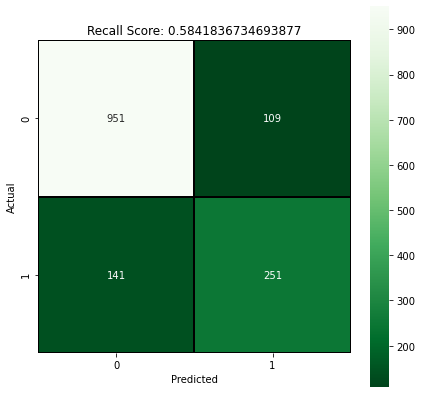

In [71]:
# plot confusion matrix in seaborn heatmap
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm_knn, annot=True, fmt='.0f', linewidth=1, linecolor='black', square = True, cmap = 'Greens_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Recall Score: {0}'.format(knn_recall)
plt.title(all_sample_title);

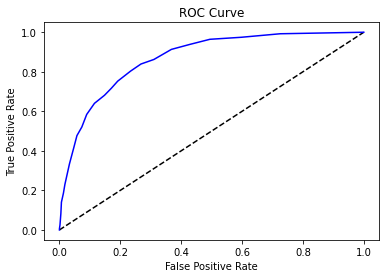

ROC_AUC:  0.8681772237196765


In [54]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('ROC_AUC: ', roc_auc)

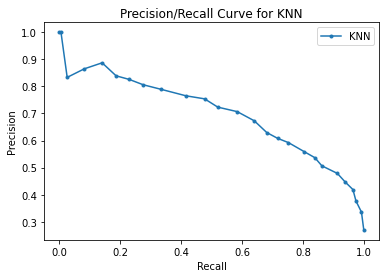

In [55]:

# plot precision/recall curve 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label='KNN')
plt.title('Precision/Recall Curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [56]:
# calculate f_beta score
fbeta = fbeta_score(y_test, y_pred, average='weighted', beta=2)
fbeta

0.8195634654774715

In [57]:
# bootstrapping

n_iters = 100
recall = []
precision = []

for i in range(n_iters):
    
    # split data into training and test set, instantiate RFC model
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.5, random_state=i)
    knn_cv = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 25)}
    knn_gscv = GridSearchCV(knn_cv, param_grid, scoring='roc_auc', cv=5)
    knn_gscv.fit(X_train, y_train)
    n_neighbors = knn_gscv.best_index_ + 1
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # fit and predict
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test_b)
    
    # calculate precision, recall
    score_recall = recall_score(y_test_b, y_pred_b)
    score_precision = precision_score(y_test_b, y_pred_b)
    
    # append scores to lists
    recall.append(score_recall)
    precision.append(score_precision)

In [58]:
# get confidence intervals for precision and recall

alpha = 0.95
p_low = 2.5 
p_high = 97.5 

lower_recall = max(0.0, np.percentile(recall, 2.5))
upper_recall = min(1.0, np.percentile(recall, 97.5))
lower_precision = max(0.0, np.percentile(precision, 2.5))
upper_precision = min(1.0, np.percentile(precision, 97.5))

print('%.1f confidence interval Recall: %.1f%% and %.1f%%' % (95, lower_recall*100, upper_recall*100))
print('%.1f confidence interval Precision: %.1f%% and %.1f%%' % (95, lower_precision*100, upper_precision*100))

95.0 confidence interval Recall: 54.1% and 58.4%
95.0 confidence interval Precision: 70.4% and 74.6%


### Logistic Regression

In [59]:
# set up param_grid with various C values
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# instantiate, perform cross-validation, and fit model
logreg = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)
logreg_cv.fit(X_train, y_train)
y_pred = logreg_cv.predict(X_test)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best Score: 0.8917851075458696


In [61]:
# instantiate, fit, and predict logreg model with optimal C parameter, threshold
logreg = LogisticRegression(C=10**0.439397, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_recall = recall_score(y_test, y_pred)

# use cross_val_score with scoring='roc_auc'
logreg_cv_score = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
print(logreg_cv_score)
print("Mean AUC Score: ", logreg_cv_score.mean())


[0.88652775 0.90109234 0.89351906 0.89193708 0.88460336]
Mean AUC Score:  0.8915359186449479


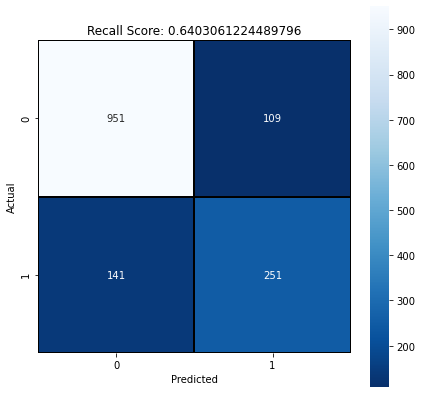

In [62]:
# plot confusion matrix in seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='.0f', linewidth=1, linecolor='black', square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Recall Score: {0}'.format(logreg_recall)
plt.title(all_sample_title);

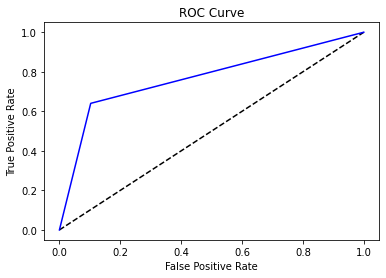

ROC_AUC:  0.7687379668848672


In [63]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict(X_test)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('ROC_AUC: ', roc_auc)

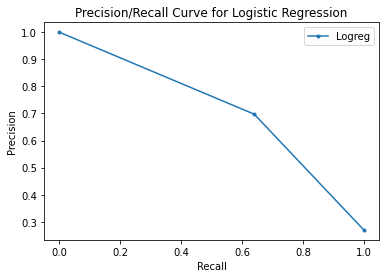

In [64]:
# plot precision/recall curve 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label='Logreg')
plt.title('Precision/Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [65]:
# calculate f-beta score
fbeta = fbeta_score(y_test, y_pred, average='weighted', beta=2)
fbeta

0.8267620855695731

In [66]:
# bootstrapping

n_iters = 100
recall = []
precision = []

for i in range(n_iters):
    
    # split data into training and test set, instantiate RFC model
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.5, random_state=i)
    logreg_cv = LogisticRegression(max_iter=1000)
    logreg_cv = GridSearchCV(logreg_cv, param_grid, scoring='roc_auc', cv=5)
    logreg_cv.fit(X_train, y_train)
    model = LogisticRegression(**logreg_cv.best_params_)
    
    # fit and predict
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test_b)
    
    # calculate precision, recall
    score_recall = recall_score(y_test_b, y_pred_b)
    score_precision = precision_score(y_test_b, y_pred_b)
    
    # append scores to lists
    recall.append(score_recall)
    precision.append(score_precision)

In [67]:
# get confidence intervals for precision and recall

alpha = 0.95
p_low = 2.5
p_high = 97.5

lower_recall = max(0.0, np.percentile(recall, 2.5))
upper_recall = min(1.0, np.percentile(recall, 97.5))
lower_precision = max(0.0, np.percentile(precision, 2.5))
upper_precision = min(1.0, np.percentile(precision, 97.5))

print('%.1f confidence interval Recall: %.1f%% and %.1f%%' % (95, lower_recall*100, upper_recall*100))
print('%.1f confidence interval Precision: %.1f%% and %.1f%%' % (95, lower_precision*100, upper_precision*100))

95.0 confidence interval Recall: 59.3% and 63.7%
95.0 confidence interval Precision: 71.7% and 75.6%
